### End of Course Assessment 

In [4]:
from datetime import datetime
CURRENT_TIME = datetime.now().strftime("%d-%m-%y_%H:%M")
AUTHOR = 'AL; HW'


from IPython.display import display, Markdown,Latex,HTML
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform,pdist


sys.path.append("../")
from Code import preprocessing as pp
%matplotlib inline
%load_ext autoreload
%autoreload 2
plt.style.use('bmh')

In [5]:
%%writefile 'my_pdf_template.tex.j2'
((*- extends 'latex/style_jupyter.tex.j2' -*))

((* block docclass *))
  \documentclass[12pt]{article}
((* endblock docclass *))

((* block packages *))
((( super() ))) % load all other packages
\usepackage{authblk}
((* endblock packages *))

((* block margins *))
\geometry{verbose,tmargin=1in,bmargin=1in,lmargin=0.75in,rmargin=0.75in}
((* endblock margins *))

((* block title -*))
((( super() ))) % load all other packages
\title{Max Planck School of cognition: Artificial Intelligence and Intelligent Systems - end of course assessment}
((*- endblock title *))

((* block date *))
\date{\today}
((* endblock date *))
    
((* block author *))
\author[1]{Anisbel Leon}
\author[1]{Also Hanna Wiedenhaus}
\affil[1]{Leibniz-Institut für Troposphärenforschung e.V., Permoserstraße 15, 04318 Leipzig}
((* endblock author *))

((* block maketitle *))
    \maketitle
    \tableofcontents
    \pagebreak
((* endblock maketitle *))

Overwriting my_pdf_template.tex.j2


In [6]:
%%capture
%%writefile 'cfg.py'

c = get_config()
c.NbConvertApp.export_format = 'pdf'
c.TemplateExporter.extra_template_basedirs = ['.']
c.Exporter.template_file = 'my_pdf_template.tex.j2'

# Is it possible to estimate the state of dementia of a patient given the deficiency of vitamin B12 and the tendency to alcoholism? 

In [7]:
display(Latex(r'''
\begin{abstract}
Test
\end{abstract}
'''))


<IPython.core.display.Latex object>

## Introduction

##### Dementia is a combination of symptoms of progressive decline in cognitive, emotional and social skills. One of the key symptoms is memory impairment. A few forms of dementia are reversible; for some other forms, limited therapeutic interventions are possible, but these can only delay the onset of certain symptoms. This report examines the proximate influences of lifestyle on the incidence of dementia. Metabolic B12 deficiency is widely prevalent and occurs in 10-40% of the population (Spence, 2016). It has long been associated with a variety of hematologic, neurologic, and psychiatric disorders. The described psychological effects associated with cobalamin deficiency range from mood swings to psychotic episodes to cognitive impairment (slow thinking, memory impairment, confusion, dementia) (Goebels and Soyka, 2000). The psychiatric syndrome most commonly associated with vitamin B12 deficiency in the medical literature is dementia (Cunha et al., 1995). Since this is one of the few treatable causes of dementia, extensive research is needed. 
##### On the other hand, alcoholims is also a factor that could produce dementia. As it is often related to personality and behavioural changes, social and personal neglect, confabulation, lack of insight, empathy and emotional control seems to be a plausible main cause of the alcoholic dementia (Brun and Andersson, 2001).

##### Investigation of the relationship between vitamin B12 deficiency, alcoholism and dementia should be based on a broad data set. Therefore, the OASIS-3 (Open Access Series of Imaging Studies) dataset is used in this study. The dataset includes MRI and PET imaging and associated clinical data for 1098 participants. The study examined 605 cognitively normal adults and 493 individuals in various stages of cognitive decline ranging in age from 42 to 95 years over a 15-year period (LaMontagne et al., 2019). 

## Methods
### Data overview
#### OASIS-3 Dataset

##### In the dataset, dementia status was assessed using the Clinical Dementia Rating Scale (CDR). Where CDR 0 represents normal cognitive function, CDR 0.5 for very mild impairment, CDR 1 for mild impairment, and CDR 2 for moderate dementia.Once a participant reached CDR 2, he or she was no longer eligible for face-to-face assessment (LaMontagne et al., 2019). Data were collected according to the Uniform Data Set (UDS), which defines a common set of clinical observations collected longitudinally from ADC participants using standard methods (Morris et al., 2006). During the assessment of the participants, a diagnostic recording and an Interview was conducted. The results were recorded in a coded dementia diagnosis: in the OASIS "ADRC Clinical Data" dx1-dx5 data type. Diagnoses for this variable included "cognitively normal," "AD dementia," "vascular dementia," and contributing factors such as vitamin deficiency, alcoholism, and mood disorders. Diagnosis identification for variables dx1-dx5 is performed separately from UDS assessments (LaMontagne et al., 2019). For data preprocessing, participants with missing data were removed from the dataset. Furthermore, the occurrence of the diagnoses "Active B-12 Deficiency", "Remote B-12 Deficiency", "Active Alcoholism" and "Remote Alcoholism" were enumerated in the data set. To investigate the possible associations between dementia, vitamin B12 deficiency and alcoholism in the present dataset, we apply different machine learning approaches.

##### ---- Data preparation ----

In [8]:
# load data
clean = pp.load('clean',reapply=True)
adrc = clean['ADRC_ADRCCLINICALDATA']
# feature selection
adrc = adrc[['ADRC_ADRCCLINICALDATA ID', 'days_since_entry', 'ageAtEntry', 'cdr', 'dx1', 'dx2','dx3','dx4','dx5',]]
adrc

,ADRC_ADRCCLINICALDATA ID,days_since_entry,ageAtEntry,cdr,dx1,dx2,dx3,dx4,dx5
0,OAS30001_ClinicalData_d0000,0,65.149895,0.0,Cognitively normal,.,.,.,.
1,OAS30001_ClinicalData_d0339,339,65.149895,0.0,Cognitively normal,.,.,.,.
2,OAS30001_ClinicalData_d0722,722,65.149895,0.0,Cognitively normal,.,.,.,.
3,OAS30001_ClinicalData_d1106,1106,65.149895,0.0,Cognitively normal,.,.,.,.
4,OAS30001_ClinicalData_d1456,1456,65.149895,0.0,Cognitively normal,.,.,.,.
...,...,...,...,...,...,...,...,...,...
6219,OAS31172_ClinicalData_d1215,1215,70.902120,0.0,Cognitively normal,.,.,.,.
6220,OAS31172_ClinicalData_d1565,1565,70.902120,0.0,Cognitively normal,.,.,.,.
6221,OAS31172_ClinicalData_d1908,1908,70.902120,0.0,Cognitively normal,Remote Hypothyroidism,.,.,.
6222,OAS31172_ClinicalData_d2816,2816,70.902120,0.0,Cognitively normal,Remote Mood disorder,.,.,.


In [9]:
# count occurrences of B 12 deficiencies and alcoholism
Active_B12_Deficiency = adrc.apply(pd.Series.value_counts, axis=1)[['Active B-12 Deficiency']].fillna(0)
Remote_B12_Deficiency = adrc.apply(pd.Series.value_counts, axis=1)[['Remote B-12 Deficiency']].fillna(0)
Remote_Alcoholism = adrc.apply(pd.Series.value_counts, axis=1)[['Remote Alcoholism']].fillna(0)
Active_Alcoholism = adrc.apply(pd.Series.value_counts, axis=1)[['Active Alcoholism']].fillna(0)

adrc[('Active_B12_Deficiency')] = Active_B12_Deficiency
adrc[('Remote_B12_Deficiency')] = Remote_B12_Deficiency
adrc[('Remote_Alcoholism')] = Remote_Alcoholism
adrc[('Active_Alcoholism')] = Active_Alcoholism

# adrc.info()
# # sum
# adrc.sum(axis=0)

<ipython-input-9-06ad67f9d52b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adrc[('Active_B12_Deficiency')] = Active_B12_Deficiency
<ipython-input-9-06ad67f9d52b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adrc[('Remote_B12_Deficiency')] = Remote_B12_Deficiency
<ipython-input-9-06ad67f9d52b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [10]:
# sns.pairplot(adrc,hue = 'Active_B12_Deficiency',palette='tab10')

##### As the distance metrics help algorithms to recognize and study a relationship between each of the elements of the dataset, we calculated some of them. A good distance metric could significantly help in improving the performance of Classification Machine Learning process.  
##### For an easier analisis of the results, the data was normalized before calculating the metrics.
##### Three distance metrics were calculated: Cosine, Euclidean and Manhattan or City Block.
##### The most common distance measure, Euclidean distance, which is quite good and representative in our study of low dimention. On the other hand, since Manhattan distance does not calculate the shortest path possible, it more likely to get higher values compared to the Euclidean distance. Although, Cosine distance show similarities in the data and seem to be reasonable, we selected the first one (Euclidean) for further applications in the machine learning methods we used in this project.    

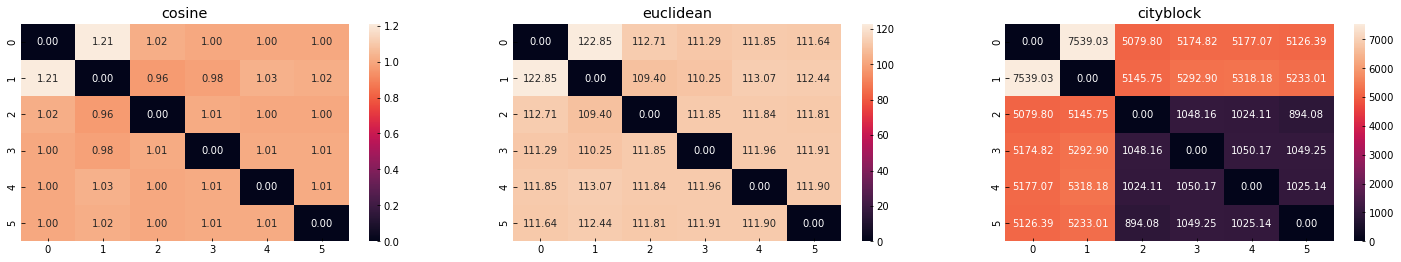

In [11]:
def plot_pdist(X,annot=True):
    fig,ax = plt.subplots(1,3,figsize=(25,4))
    for i,dist in zip(range(4),['cosine','euclidean', 'cityblock']):
        sns.heatmap(squareform(pdist(X.T,metric=dist).round(2)),ax=ax[i], annot=annot, fmt="0.2f")
        ax[i].set_title(dist)
        
var = [1,2,9,10,11,12]
array = adrc.values
X = array[:,var]
X = np.int32(X)
Y = array[:,3]
Y = np.int32(Y)
           
from sklearn import preprocessing
x_norm = preprocessing.scale(X)
plot_pdist(x_norm,annot=True)

##### There are a lot of Machine Learning methods to be applied based on supervised and unsupervised learning. In the present work we selected just two supervised learning methods: K-Nearest Neighbor (KNN) and Logistic Regression.
##### Both are clasification models and, despite their simplicity, they are very popular machine learning algorithms. KNN has proven to be incredibly effective at certain tasks in machine learning.
##### Our main goal from now on, is to find the best parameters to train KNN using some training set and get the highest performance when it is tested with the testing set. 

##### Before we move forward, it is necessary to understand how these methods work.
##### 1. The KNN algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set (<a href="https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/"> more </a>).
##### 2. Logistic Regression models the probabilities for classification problems with two possible outcomes. It’s an extension of the linear regression model for classification problems (<a href="https://christophm.github.io/interpretable-ml-book/logistic.html"> more </a>).


#####  For KNN, the distance between the new point and each training point is calculated, in our case we selected Euclidean distance for this calculation (<a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html"> more about the python method used </a>). 


## Results and Discussion 

#### For validation, we use k-fold cross-validation. In this procedure, the data set is divided into training and test data. The technique has a single parameter called k, which refers to the number of groups into which the dataset is divided. We chose k=10, which is a 10-fold cross-validation.  This means that each sample is included once in a test data set and is used k-1 times to train the model. Cross-validation is primarily used in applied machine learning to estimate the capabilities of a machine learning model. That is, a limited sample is used to estimate how the model will perform in general when used to make predictions on data that was not used during the training of the model.

#### Two analysis were made applying Cross-validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set: 
#### - Train test split approach
#### - Kfold

#### The next figure represents the training and testing accuracy for different numbers of neighbors, K. 
#### As it is expected the training score is allways higher than the testing score.The last one present a relatively low accuracy for k < 4 when it is compared with the training score. For K > 4 the performance seems to be almost the same for any K.
#### This analysis provides valuable information, the highest testing accuracy occurs when K = 6 and for K > 4 is always bigger than 91%. 


The number of neighbours in the KN Classifier with the highest testing accuracy (91.542%) is: 
 6


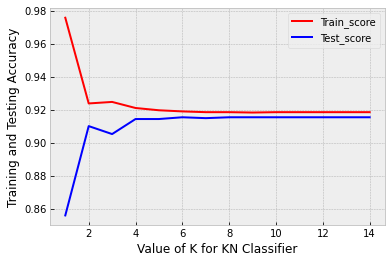

In [21]:



from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score#Load the dataset

neighbors = range(1, 15)
names = []
performance ={}
[names.append('neigh_'+str(i)) for i in neighbors]
performance = [{l:{}} for l in names]

for i in range(len(neighbors)):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
    KNN_Classifier = KNeighborsClassifier(n_neighbors = neighbors[i], p = 2, metric='minkowski')
    #Train the model
#     %time
    KNN_Classifier.fit(x_train, y_train)
    
    #Let's predict the classes for test data
    pred_test = KNN_Classifier.predict(x_test)
    performance[i] = {'Train_score':
                     accuracy_score(y_train,KNN_Classifier.predict(x_train)),
                     'Test_score':
                     accuracy_score(y_test,KNN_Classifier.predict(x_test))}

    
#     print(f"Performance(n_neighbors = {i}): ", perfomance,'\n')


def accu_score(performance,n):
    Train_score = []
    Test_score  = []
    for i in range(len(n)):
        Train_score.append(performance[i]['Train_score'])
        Test_score.append(performance[i]['Test_score'])
   
    print(f'The number of neighbours in the KN Classifier with the highest testing accuracy ({round(max(Test_score)*100.0,3)}%) is: \n', Test_score.index(max(Test_score))+1)


    fig, ax = plt.subplots(1,1,figsize=(6, 4)) 
    plt.plot(n, Train_score,color = 'r')
    plt.plot(n, Test_score,color = 'b')
    plt.legend(['Train_score','Test_score'])
    plt.xlabel('Value of K for KN Classifier')
    plt.ylabel('Training and Testing Accuracy')

accu_score(performance,neighbors)

#### However, we are probably not using a significant portion of our dataset. For more reliable results, we use kfold, to divide a data set into training and test sets.
#### The figure, shows in the upper pannel, a bar plot showing the performance of KNN for different K values. The error bars are quite low and in the table are presented the specific accuracy values and the standard deviation.
#### The lower left panel plot looks similar to the test_score curve from the previous analysis nevertheless, in this case the number of neighbours in the KN Classifier with the highest accuracy (91.758 % which is also a better performance than the best score form the previous analysis) is K = 8.


The number of neighbours in the KN Classifier with the highest accuracy  (91.758%) is: 
 8


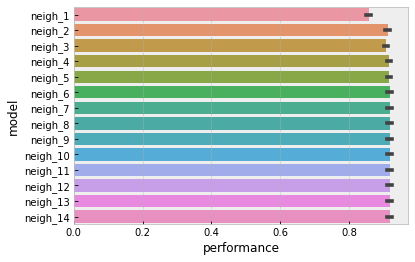

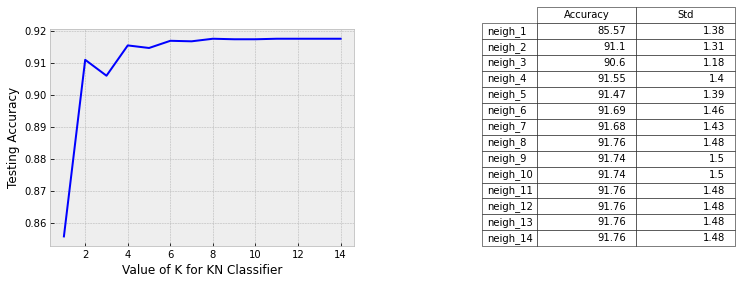

In [20]:
# Evaluate using Cross Validation
# kfold: Split a dataset into training and test sets
from sklearn.model_selection import KFold

performance ={}
# performance = [{l:[]} for l in names]
results = {}

k = 15
for i in range(len(neighbors)):
    kfold = KFold(n_splits=k,random_state=7, shuffle=True)
    perf = []
#     %time
    model =  KNeighborsClassifier(n_neighbors = neighbors[i], p = 2, metric='minkowski')
    for j,(ix_train, ix_test) in enumerate(kfold.split(Y)):
        model.fit(X[ix_train],Y[ix_train])
        perf.append(accuracy_score(Y[ix_test],model.predict(X[ix_test])))
    results[names[i]] = cross_val_score(model, X, Y, cv=kfold)
    performance[names[i]]= perf

#     print(model,'\n',"Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0),'\n',results,'\n')


df = pd.DataFrame(performance.values(),index=performance.keys()).stack().reset_index()
df.columns = ['model','k','performance']
ax = sns.barplot(y="model", x="performance", data=df)


# def sec_max(list1):
#     mx=max(list1[0],list1[1])
#     secondmax=min(list1[0],list1[1])
#     n =len(list1)
#     for i in range(2,n):
#         if list1[i]>mx:
#             secondmax=mx
#             mx=list1[i]
#         elif list1[i]>secondmax and \
#             mx != list1[i]:
#             secondmax=list1[i]

#     return secondmax



def accu_score_CV(performance,n,names):
    Test_score, Scores  = [],[]
    
    for i in performance:
        score = performance[i]
        Scores.append([score.mean()*100.0, score.std()*100.0])
        Test_score.append(score.mean())
        
        
        
    fig, ax = plt.subplots(1,2,figsize=(12, 4)) 
    ax[0].plot(n, Test_score,color = 'b')
    ax[0].set_xlabel('Value of K for KN Classifier')
    ax[0].set_ylabel('Testing Accuracy')
    
    column_labels=["Accuracy", "Std"]
    
    df=pd.DataFrame(Scores,index = names, columns=column_labels)
    ax[1].table(cellText=df.round(2).values,colLabels=df.columns,
                rowLabels=df.index,bbox=(0.4, 0, 0.65, 1.1))
    ax[1].axis('off')

    maxi = max(Test_score)
    print(f'The number of neighbours in the KN Classifier with the highest accuracy  ({round((maxi)*100.0,3)}%) is: \n', \
          Test_score.index(maxi)+1)


accu_score_CV(results,neighbors,names)


# k = 10
# kfold = KFold(n_splits=k,random_state=100, shuffle=True)
# neighbors = [4,6]
# for i in neighbors:
# #     %time
#     KNN_Classifier = KNeighborsClassifier(n_neighbors = i, p = 2, metric='minkowski')
#     results = cross_val_score(KNN_Classifier, X, Y, cv=kfold)
    
# #     print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0),'\n')

    
    

# folds = np.zeros((len(Y),k)).astype(bool)
# for i,(train_index, test_index) in enumerate(kfold.split(Y)):
#     folds[test_index,i] = True   
# f, ax = plt.subplots(1,1,figsize=(10, 4)) 
# ax.imshow(folds.T, interpolation='nearest',aspect='auto');
# # ax.tick_params(**tick_args)
# ax.set_title('10-folds index matrix')
# ax.set_ylabel(f"Folds (K={k})");                    

# print(results)

#### So far we have a machine learning method that accurately represents and describes our data.

#### What about testing another method?
#### As mentioned before, Logistic Regression is a very simple method which has two possible outcomes and uses a logistic function to model a binary dependent variable. We accomodate our the settings selecting the best solver for small datasets (<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html"> more about the python method used </a>).

#### Interestingly, applying this algorithm, we obtained the same precision as for the best KNN. This could be related to the simplicity of the data used. 
#### The figure shows that both methods are good for estimation. The execution time was also measured, but in both cases it turned out to be very similar.

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs
KNeighborsClassifier(n_neighbors=8) 
 Accuracy: 91.758% (1.485%) 

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs
LogisticRegression(solver='liblinear') 
 Accuracy: 91.758% (1.485%) 



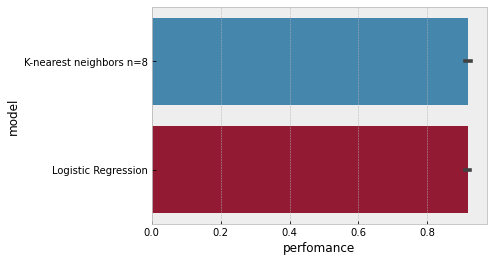

In [26]:

models = {
    "K-nearest neighbors n=8" :  KNeighborsClassifier(n_neighbors=8, p = 2, metric='minkowski'),
    "Logistic Regression" :LogisticRegression(solver='liblinear'),
    }


k = 15
perfomance = {}
for i,(title,mdl) in enumerate(models.items()):
    kfold = KFold(n_splits=k,random_state=7, shuffle=True)
    _perf = []
    
    %time
    for j,(ix_train, ix_test) in enumerate(kfold.split(Y)):
        mdl.fit(X[ix_train],Y[ix_train])
        _perf.append(accuracy_score(Y[ix_test],mdl.predict(X[ix_test])))
    results = cross_val_score(mdl, X, Y, cv=kfold)
    perfomance[title] = _perf
    
    print(mdl,'\n',"Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0),'\n')


   
df = pd.DataFrame(perfomance.values(),index=perfomance.keys()).stack().reset_index()
df.columns = ['model','k','perfomance']
ax = sns.barplot(y="model", x="perfomance", data=df)




# from sklearn.metrics import confusion_matrix
# perfomance = {}
# fig,ax = plt.subplots(1,2,sharey=True,sharex=True,figsize=(16,5))

# print(Y.shape,X.shape)

# for ix,(title,mdl) in enumerate(models.items()):
#     cv = KFold(n_splits=15,random_state=7, shuffle=True)
#     y_hat = Y**0
#     for j,(ix_train, ix_test) in enumerate(cv.split(Y)):
#         mdl.fit(x_norm[ix_train],Y[ix_train])
#         y_hat[ix_test] = mdl.predict(x_norm[ix_test])
#     perfomance[title] = y_hat
#     i,j = np.unravel_index(ix, (2,4))
#     cfm = confusion_matrix(Y,y_hat)
#     print(Y.shape,y_hat)
#     print(cfm.shape)
#     vmin,vmax = np.min(cfm),np.max(cfm)
#     _mask = np.eye(*cfm.shape, dtype=bool)
#     sns.heatmap(cfm, annot=True, mask=~_mask, cmap='Blues',fmt="d", vmin=vmin, vmax=vmax,ax=ax[j])
#     sns.heatmap(cfm, annot=True, mask=_mask, cmap='OrRd',fmt="d", vmin=vmin, vmax=vmax, cbar_kws=dict(ticks=[]),ax=ax[j])
#     ax[j].set_title(title)



## Conclusions

####  In this work we aimed to investigate whether is possible to determine dementia tendencies in a patient of a certain age and vitamin B12 deficiency and alcoholism tendency information. We applied two machine learning approaches. One of them (K Neighbors Classifier) was tested for various paramaters and was adjusted to get a better accuracy in the estimation. Our data was split into test and training sets and, both supervised clasiffication algorithms used presented high accuracy 91.758% and low errors indicating that could be applied for the estimation of Clinical Dementia Rating Scale (CDR).     

In [4]:
%%bash setup.sh

UsageError: %%bash is a cell magic, but the cell body is empty.


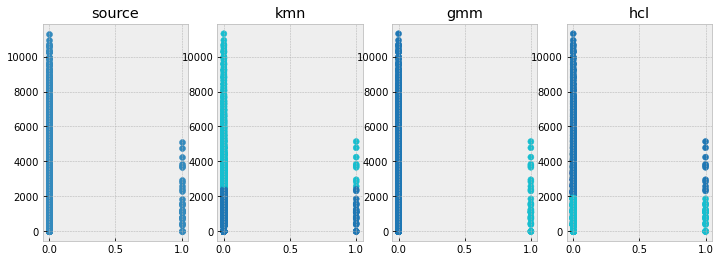

In [188]:



from sklearn.cluster import KMeans,AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn.mixture import GaussianMixture
models = {"kmn" : KMeans(n_clusters=2),
          "gmm" : GaussianMixture(n_components=2),
          "hcl" : AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')}
results = {}
for key,mdl in models.items():
    results[key] = mdl.fit(X)

    
f, ax = plt.subplots(1,4,figsize=(12, 4)) 
ax[0].scatter(x=X[:,-1], y=X[:,0],cmap='tab10')
ax[0].set_title('source')
for i,key in enumerate(models.keys()):
    labels_ = results[key].labels_ if not key=='gmm' else results[key].fit_predict(X)
    ax[i+1].scatter(x=X[:,-1], y=X[:,0],cmap='tab10', c=labels_)
    ax[i+1].set_title(key)

In [189]:
%%capture
%%writefile -a 'my_pdf_template.tex.j2'

((* block bibliography *))
\bibliographystyle{unsrt}
\bibliography{ref}
((* endblock bibliography *))

In [29]:
%%capture
%%writefile 'ref.bib'

@Article{LaMontagne_2019,
  author    = {Pamela J. LaMontagne and Tammie LS. Benzinger and John C. Morris and Sarah Keefe and Russ Hornbeck and Chengjie Xiong and Elizabeth Grant and Jason Hassenstab and Krista Moulder and Andrei G. Vlassenko and Marcus E. Raichle and Carlos Cruchaga and Daniel Marcus},
  title     = {{OASIS}-3: Longitudinal Neuroimaging, Clinical, and Cognitive Dataset for Normal Aging and Alzheimer Disease},
  year      = {2019},
  month     = {dec},
  doi       = {https://doi.org/10.1101/2019.12.13.19014902},
  publisher = {Cold Spring Harbor Laboratory},
}

@Article{Cunha_1995,
  author    = {Ulisses Gabriel de Vasconcelos Cunha and F{\'{a}}bio Lopes Rocha and Josecy Maria de Souza Peixoto and Maria Fl{\'{a}}via de Mor{\~{a}}o Motta and Maira Tonidandel Barbosa},
  journal   = {International Psychogeriatrics},
  title     = {Vitamin B12 Deficiency and Dementia},
  year      = {1995},
  month     = {mar},
  number    = {1},
  pages     = {85--88},
  volume    = {7},
  doi       = {https://doi.org/10.1017/S1041610295001876},
  publisher = {Cambridge University Press ({CUP})},
} 
   
@Article{Goebels_2000,
  author    = {Norbert Goebels and Michael Soyka},
  journal   = {The Journal of Neuropsychiatry and Clinical Neurosciences},
  title     = {Dementia Associated With Vitamin B12Deficiency},
  year      = {2000},
  month     = {aug},
  number    = {3},
  pages     = {389--394},
  volume    = {12},
  doi       = {https://doi.org/10.1176/jnp.12.3.389},
  publisher = {American Psychiatric Association Publishing},
}               

@Article{Spence_2016,
  author    = {J. David Spence},
  journal   = {Nutrition Research},
  title     = {Metabolic vitamin B12 deficiency: a missed opportunity to prevent dementia and stroke},
  year      = {2016},
  month     = {feb},
  number    = {2},
  pages     = {109--116},
  volume    = {36},
  doi       = {https://doi.org/10.1016/j.nutres.2015.10.003},
  publisher = {Elsevier {BV}},
} 
               
@Article{Morris_2006,
  author    = {John C. Morris and Sandra Weintraub and Helena C. Chui and Jeffrey Cummings and Charles DeCarli and Steven Ferris and Norman L. Foster and Douglas Galasko and Neill Graff-Radford and Elaine R. Peskind and Duane Beekly and Erin M. Ramos and Walter A. Kukull},
  journal   = {Alzheimer Disease {\&} Associated Disorders},
  title     = {The Uniform Data Set ({UDS}): Clinical and Cognitive Variables and Descriptive Data From Alzheimer Disease Centers},
  year      = {2006},
  month     = {oct},
  number    = {4},
  pages     = {210--216},
  volume    = {20},
  doi       = {10.1097/01.wad.0000213865.09806.92},
  publisher = {Ovid Technologies (Wolters Kluwer Health)},
}      

@Article{Brun_2001,
  author    = {Brun, A. and Andersson, J.},
  journal   = {Dementia and Geriatric Cognitive Disorders},
  title     = {Frontal Dysfunction and Frontal Cortical Synapse Loss in Alcoholism –The Main Cause of Alcohol Dementia?},
  year      = {2001},
  month     = {oct},
  number    = {4},
  pages     = {289--294},
  volume    = {12},
  doi       = {10.1159/000051271},
  publisher = {Ovid Technologies (Wolters Kluwer Health)},
}  
               

In [1]:
%%capture
%%bash -s "$CURRENT_TIME" "$AUTHOR"
mkdir -p pdf 
jupyter nbconvert --no-input --output pdf/some_notebook.pdf --config cfg.py  some_notebook.ipynb

CalledProcessError: Command 'b'mkdir -p pdf \njupyter nbconvert --no-input --output pdf/some_notebook.pdf --config cfg.py  some_notebook.ipynb\n'' returned non-zero exit status 255.